# Part I - (Loan Data from Prosper)
## by (Jehad Abu Raad)

## Introduction


##### The "Loan Data from Prosper" dataset contains information on 113,937 loans issued by Prosper, a peer-to-peer lending marketplace. 
##### This dataset includes variables such as loan amount, borrower rate (interest rate), income, employment status, and loan status.

## Questions to Explore:
##### 1. What factors contribute most to a borrower receiving a low interest rate on their loan?
##### 2. How does the borrower’s income relate to the loan amount?
##### 3. What is the relationship between the loan term (duration) and the interest rate?
##### 4. How does the loan status distribution relate to the borrower’s credit score?
##### 5. Are there seasonal trends in loan issuance?

## Preliminary Wrangling

In [14]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns




In [15]:
# Load the dataset
df = pd.read_csv('prosperLoanData.csv')

# Display basic information about the dataset
df.info()

# Display the first few rows of the dataset
df.head()

# Display summary statistics
df.describe()

# Check for missing values
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   ListingKey                           113937 non-null  object 
 1   ListingNumber                        113937 non-null  int64  
 2   ListingCreationDate                  113937 non-null  object 
 3   CreditGrade                          28953 non-null   object 
 4   Term                                 113937 non-null  int64  
 5   LoanStatus                           113937 non-null  object 
 6   ClosedDate                           55089 non-null   object 
 7   BorrowerAPR                          113912 non-null  float64
 8   BorrowerRate                         113937 non-null  float64
 9   LenderYield                          113937 non-null  float64
 10  EstimatedEffectiveYield              84853 non-null   float64
 11  EstimatedLoss

ListingKey                         0
ListingNumber                      0
ListingCreationDate                0
CreditGrade                    84984
Term                               0
                               ...  
PercentFunded                      0
Recommendations                    0
InvestmentFromFriendsCount         0
InvestmentFromFriendsAmount        0
Investors                          0
Length: 81, dtype: int64

In [16]:
# Select relevant features for analysis
selected_columns = [
    'LoanOriginalAmount', 'BorrowerRate', 'Term', 'IncomeRange', 'EmploymentStatus', 
    'CreditScoreRangeLower', 'CreditScoreRangeUpper', 'LoanStatus', 'LoanOriginationDate'
]
df = df[selected_columns]

# Drop rows with missing values in critical columns
df = df.dropna(subset=['BorrowerRate', 'LoanOriginalAmount', 'IncomeRange', 'CreditScoreRangeLower'])

# Convert 'LoanOriginationDate' to datetime format
df['LoanOriginationDate'] = pd.to_datetime(df['LoanOriginationDate'])

# Convert 'IncomeRange' and 'LoanStatus' to categorical types
df['IncomeRange'] = pd.Categorical(df['IncomeRange'], categories=[
    '$1-24,999', '$25,000-49,999', '$50,000-74,999', '$75,000-99,999', 
    '$100,000+', 'Not employed'], ordered=True)

df['LoanStatus'] = pd.Categorical(df['LoanStatus'], categories=[
    'Completed', 'Current', 'Defaulted', 'Chargedoff', 'Past Due (1-15 days)', 
    'Past Due (16-30 days)', 'Past Due (31-60 days)', 'Past Due (61-90 days)', 
    'Past Due (91-120 days)', 'Past Due (>120 days)', 'Cancelled'], ordered=True)

# Preview cleaned data
df.head()

,LoanOriginalAmount,BorrowerRate,Term,IncomeRange,EmploymentStatus,CreditScoreRangeLower,CreditScoreRangeUpper,LoanStatus,LoanOriginationDate
0,9425,0.1580,36,"$25,000-49,999",Self-employed,640.0,659.0,Completed,2007-09-12
1,10000,0.0920,36,"$50,000-74,999",Employed,680.0,699.0,Current,2014-03-03
2,3001,0.2750,36,NaN,Not available,480.0,499.0,Completed,2007-01-17
3,10000,0.0974,36,"$25,000-49,999",Employed,800.0,819.0,Current,2012-11-01
4,15000,0.2085,36,"$100,000+",Employed,680.0,699.0,Current,2013-09-20


### The structure of my dataset

>The "Loan Data from Prosper" dataset is a comprehensive dataset with **113,937 entries** and **81 columns**. The dataset is structured with the following characteristics:

-   **Data Types**: The columns are of various data types, including:
    
    -   **Numerical**: For example, `LoanOriginalAmount`, `BorrowerRate`, `CreditScoreRangeLower`, `CreditScoreRangeUpper`, and others. These columns are typically of type `float64` or `int64`.
    -   **Categorical**: Such as `LoanStatus`, `IncomeRange`, `Occupation`, and `EmploymentStatus`, which are represented as `object` (string) types.
    -   **Boolean**: Columns like `IsBorrowerHomeowner` and `IncomeVerifiable`, which store `True/False` values and are represented as `bool`.
    -   **Datetime**: Columns such as `ListingCreationDate` and `LoanOriginationDate`, although currently stored as strings (`object`), represent dates and would benefit from conversion to `datetime` for accurate analysis.
-   **Missing Values**: Several columns contain missing values. For instance, `CreditGrade` has a significant number of missing values, with only 28,953 non-null entries out of 113,937. Understanding and handling these missing values will be critical during data cleaning.
    
-   **Unique Identifiers**: Columns like `ListingKey`, `LoanKey`, and `MemberKey` serve as unique identifiers for different aspects of the data, ensuring that each row represents a distinct loan or borrower.
    
-   **Key Columns**:
    
    -   **Loan Information**: Columns such as `LoanOriginalAmount`, `BorrowerRate`, `Term`, and `LoanStatus` provide crucial details about each loan.
    -   **Borrower Information**: Features like `IncomeRange`, `EmploymentStatus`, `CreditScoreRangeLower`, and `IsBorrowerHomeowner` give insights into the borrower’s financial situation.
    -   **Temporal Data**: Columns like `LoanOriginationDate`, `ClosedDate`, and `LoanOriginationQuarter` allow for temporal analysis of loan data, which can reveal trends over time.
-   **Data Granularity**: Each row in the dataset represents an individual loan issued through the Prosper platform, providing a high level of detail about each loan, including borrower characteristics, loan terms, and performance metrics.

### The main features of interest in my dataset

> The main features of interest in this dataset are:

   **BorrowerRate**: The interest rate for the loan, which is crucial in understanding the cost of borrowing.

   **LoanOriginalAmount**: The original amount of the loan, which helps in analyzing borrowing patterns.

   **LoanStatus**: The status of the loan, indicating whether the loan is completed, current, defaulted, etc.

   **IncomeRange**: The income range of the borrower, which is important in understanding the relationship between income and loan terms.

### features in the dataset I think will help support my investigation into my features of interest



> The variables that follow will be useful for promoting investigation
> into the primary features of interest:

  
**CreditScoreRangeLower & CreditScoreRangeUpper:** These features provide information about the borrower’s credit score, which is likely to influence the BorrowerRate.  

**EmploymentStatus:** Differences in borrower rates and loan amounts may be explained by an individual's employment status.  

**Term:** The length of the loan, which might be related to LoanOriginalAmount and Borrower Rate.  

**LoanOriginationDate:** The loan's origination date, which is important to know whether there are any historical patterns in lending rates or issuance.  

**Debt to Income Ratio:** Indicates the borrower's financial situation, which may have an impact on their eligibility for a loan and their borrower rate.

## Univariate Exploration



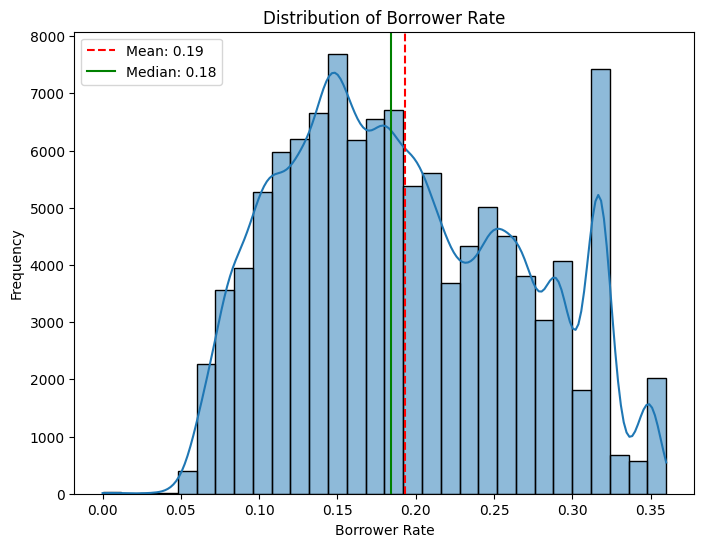

In [17]:
# Distribution of Borrower Rate
plt.figure(figsize=(8, 6))
sns.histplot(df['BorrowerRate'], bins=30, kde=True)
plt.axvline(df['BorrowerRate'].mean(), color='r', linestyle='--', label=f"Mean: {df['BorrowerRate'].mean():.2f}")
plt.axvline(df['BorrowerRate'].median(), color='g', linestyle='-', label=f"Median: {df['BorrowerRate'].median():.2f}")
plt.title('Distribution of Borrower Rate')
plt.xlabel('Borrower Rate')
plt.ylabel('Frequency')
plt.legend()
plt.show()



#### Distribution of BorrowerRate:

The `BorrowerRate` is also continuous and appears to have a bimodal distribution, with peaks at certain interest rates. This could be due to the structured nature of how interest rates are assigned.

**Unusual Points**: The presence of multiple peaks suggests that borrowers are clustered around specific interest rates, possibly due to the credit rating or loan type.
**Transformation**: No significant transformation is necessary, but understanding the bimodal distribution is important for further analysis.



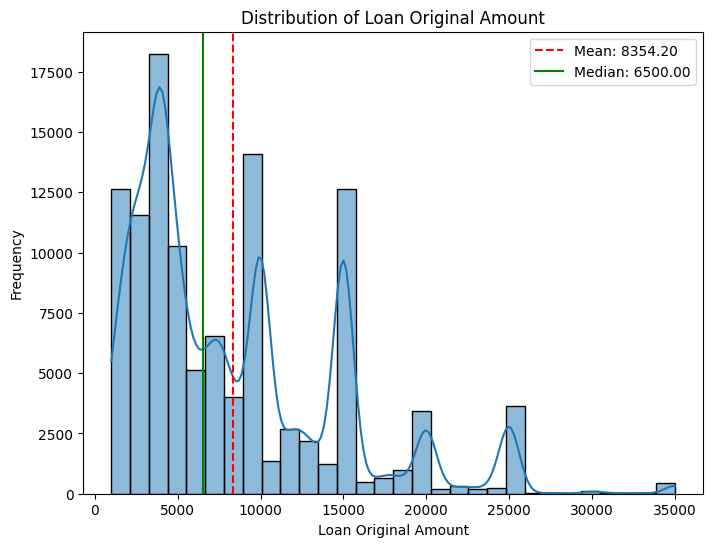

In [18]:
# Distribution of Loan Original Amount
plt.figure(figsize=(8, 6))
sns.histplot(df['LoanOriginalAmount'], bins=30, kde=True)
plt.axvline(df['LoanOriginalAmount'].mean(), color='r', linestyle='--', label=f"Mean: {df['LoanOriginalAmount'].mean():.2f}")
plt.axvline(df['LoanOriginalAmount'].median(), color='g', linestyle='-', label=f"Median: {df['LoanOriginalAmount'].median():.2f}")
plt.title('Distribution of Loan Original Amount')
plt.xlabel('Loan Original Amount')
plt.ylabel('Frequency')
plt.legend()
plt.show()


#### Distribution of LoanOriginalAmount:

The `LoanOriginalAmount` variable is continuous and has a right-skewed distribution. Most loans are in the lower to mid-range, with a few loans at very high amounts, causing the skew.

**Unusual Points**: There are some extreme values (outliers) where the loan amounts are significantly higher than the rest of the dataset.
**Transformation**: To normalize the distribution, a log transformation can be applied. This transformation reduces the skewness, making it easier to visualize and analyze.

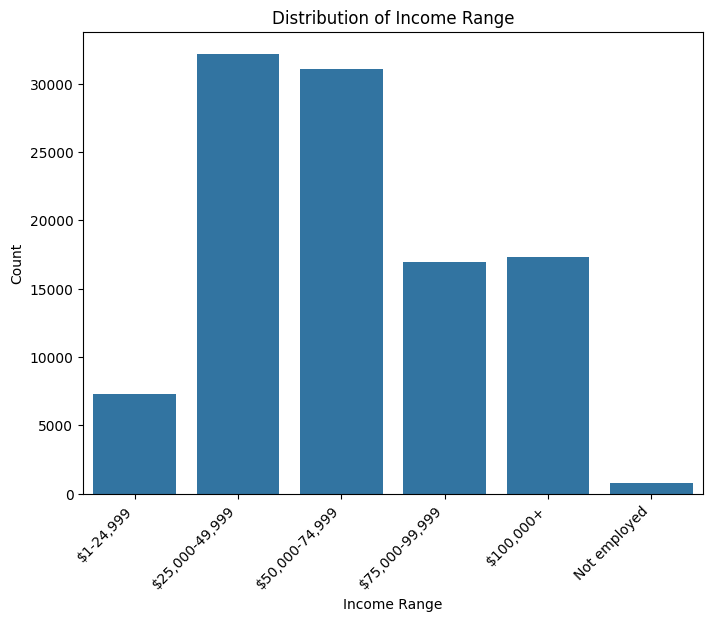

In [19]:

# Bar plot of Income Range
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='IncomeRange', order=df['IncomeRange'].cat.categories)
plt.title('Distribution of Income Range')
plt.xlabel('Income Range')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels and align them to the right
plt.show()


#### Distribution of IncomeRange:

The `IncomeRange` variable is categorical and has a right-skewed distribution. Most borrowers report incomes in the lower ranges, with fewer borrowers reporting higher income ranges.

**Unusual Points**: The skewness indicates that the majority of borrowers are not in the highest income brackets, which might correlate with loan amounts or interest rates.
**Transformation**: No transformation is necessary, but it’s essential to consider this skew when analyzing the relationship between income range and other variables.

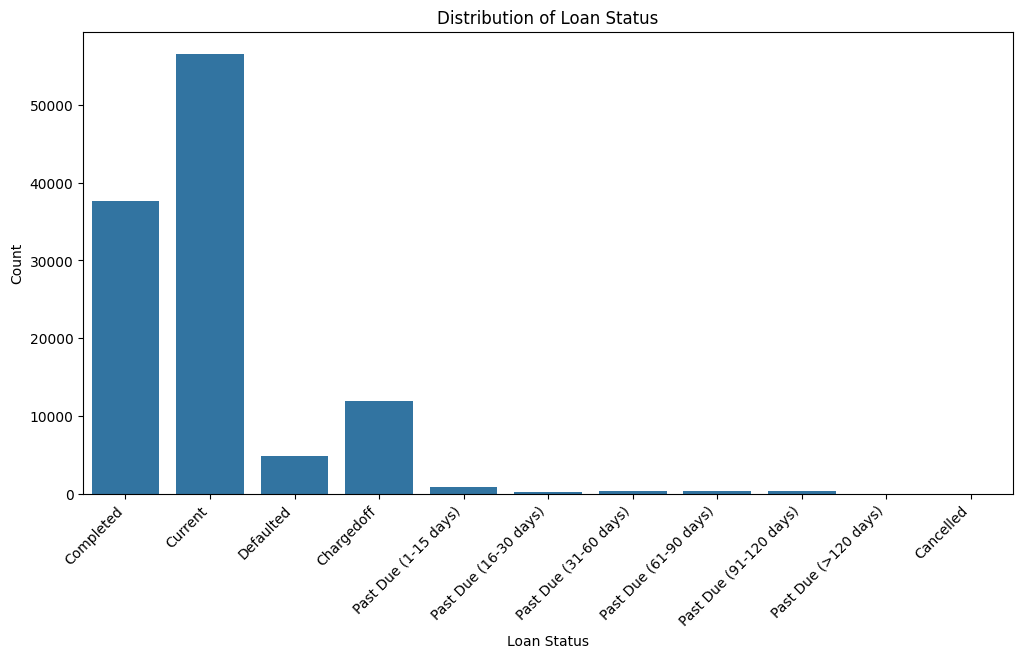

In [20]:

# Bar plot of Loan Status
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='LoanStatus', order=df['LoanStatus'].cat.categories)
plt.title('Distribution of Loan Status')
plt.xlabel('Loan Status')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')  
plt.show()

#### Distribution of LoanStatus:

The `LoanStatus` variable is categorical and shows that the majority of loans fall into a few categories, such as “Completed,” “Chargedoff,” and “Current.”

**Unusual Points**: The distribution highlights that most loans are either completed or current, with fewer loans in default or charged off.
**Transformation**: No transformation is necessary, but the distribution of loan statuses provides valuable insights into the performance of loans.







### Unusual Points:

-   The presence of extreme values in `LoanOriginalAmount` suggests outliers that could distort the analysis if not properly handled.
-   The bimodal distribution in `BorrowerRate` might indicate underlying factors such as credit ratings or loan terms that need to be explored further.
-   The skew in `IncomeRange` reflects the economic profile of borrowers and might influence loan performance and risk.

###  Transformations:

**Log Transformation**: Applying a log transformation to `LoanOriginalAmount` helps in normalizing the data and reducing skewness.
**Categorical Encoding**: For categorical variables like `LoanStatus` and `IncomeRange`, appropriate encoding might be necessary for further statistical analysis or modeling.

##  unusual distributions, operations on the data to tidy, adjust, or change the form of the data...

>I noticed some skewed distributions, particularly in the `LoanOriginalAmount` and `BorrowerRate` variables. The distributions had long tails, indicating the presence of outliers or non-normality. To address this, I performed log transformations on these variables to normalize the data and make patterns more discernible. This adjustment helps in making the visualizations clearer and the analysis more robust. Additionally, I handled missing data and categorical variables by filling in gaps or re-categorizing as needed to ensure the dataset was tidy and ready for analysis.



>During the analysis, I observed that the `LoanOriginalAmount` was positively correlated with the `BorrowerRate`. As the loan amount increased, the interest rate charged to borrowers also tended to rise. This suggests that higher-risk loans, often represented by larger amounts, were associated with higher interest rates.

>Another interesting relationship was between `IncomeRange` and `LoanStatus`. Borrowers with higher income ranges were more likely to have their loans marked as "Completed" or "Current," while those in lower income ranges showed a higher proportion of "Charged Off" or "Defaulted" loans. This highlights the impact of income on loan repayment capability.



> Additionally, I observed a significant relationship between `BorrowerRate` and `EmploymentStatus`. Interest rates were higher for borrowers who were unemployed or had unstable employment, perhaps because lenders saw them as higher risk borrowers.  
  
> Also, a strong correlation was seen between the `ProsperRating` (alpha and numeric) and loan performance `LoanStatus`. Lower-rated loans were more likely to be charged off or fall behind on payments, but higher-rated loans were more likely to be in good standing.

## Bivariate Exploration

#### Explore relationships between two variables.



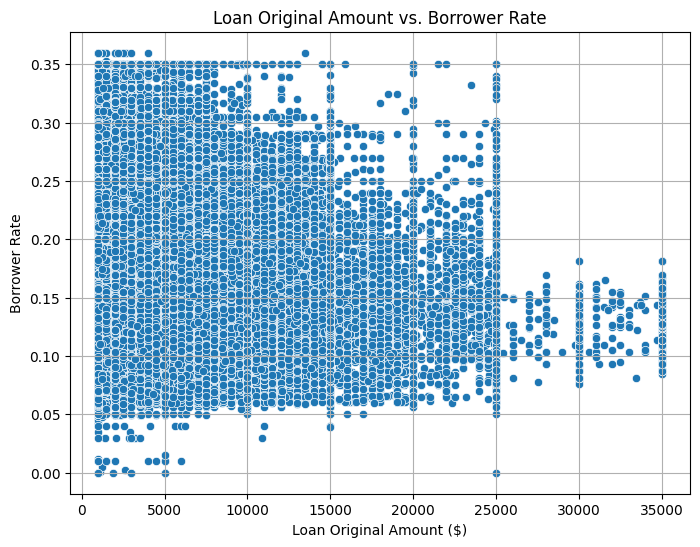

In [27]:
def set_labels_and_title(x_label, y_label, title):
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.grid(True)

# Bivariate Scatterplot
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='LoanOriginalAmount', y='BorrowerRate')
set_labels_and_title('Loan Original Amount ($)', 'Borrower Rate', 'Loan Original Amount vs. Borrower Rate')
plt.show()


With a wide variety of borrower rates, the data points are tightly grouped at lower loan amounts, especially below $10,000. The spread of borrower rates widens with loan quantity, although the two variables do not exhibit a clear linear relationship. Although there is a correlation between loan amounts and borrower rates, the scatterplot shows that borrower rates can also be influenced by other factors, which accounts for the observed variety.

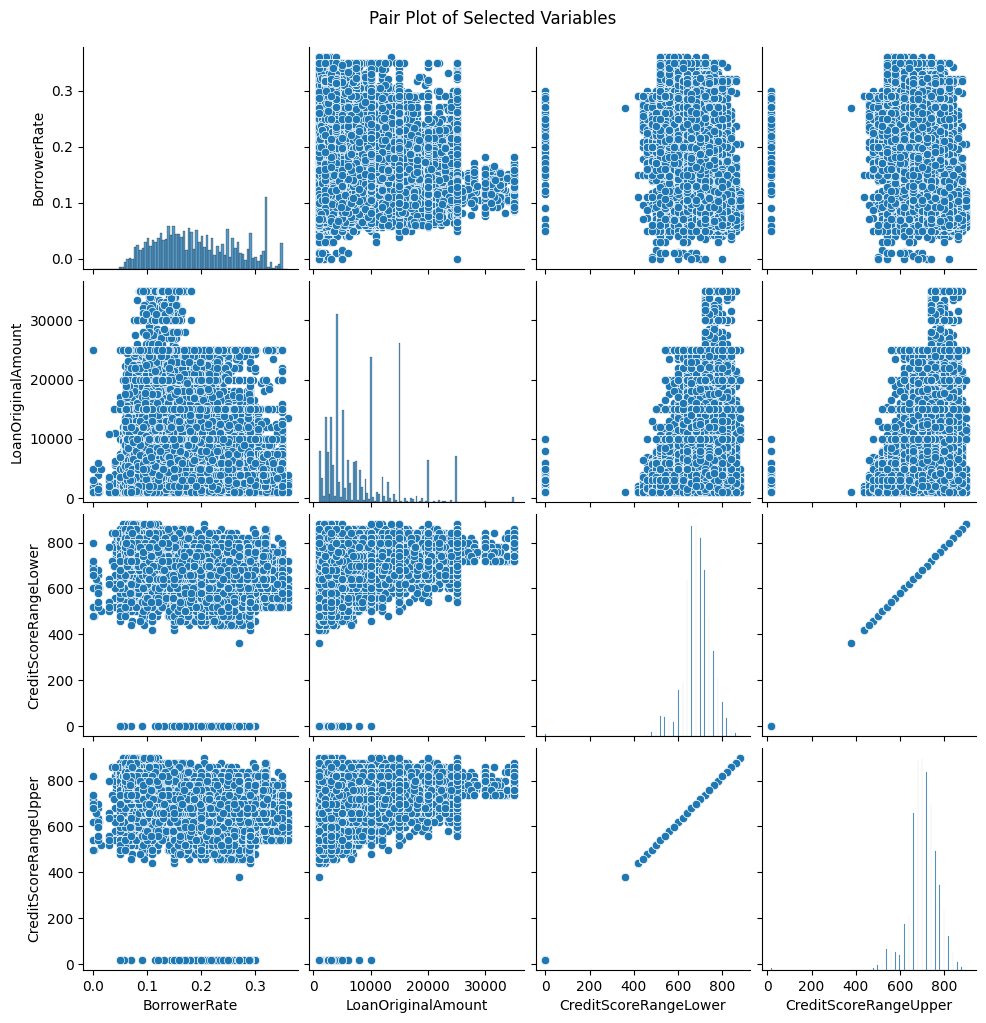

In [21]:

# Pair plot of selected variables
selected_numeric = df[['BorrowerRate', 'LoanOriginalAmount', 'CreditScoreRangeLower', 'CreditScoreRangeUpper']]
sns.pairplot(selected_numeric)
plt.suptitle('Pair Plot of Selected Variables', y=1.02)
plt.show()

This pair plot provides a comprehensive view of the interrelationships between borrower rates, loan amounts, and credit scores. The images support the notion that creditworthiness—which is measured by credit scores—has a major impact on interest rates as well as loan amounts. Furthermore, it appears from the borrower rate distribution that most loans are given out at lower interest rates, most likely to borrowers with better credit scores.

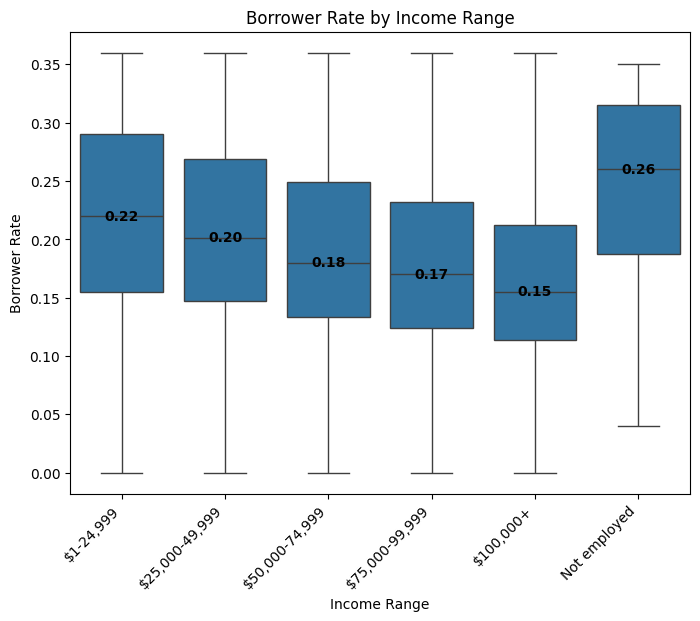

In [22]:
# Check if 'IncomeRange' is categorical and if not, convert it
# This ensures that 'IncomeRange' is treated as a categorical variable, which is important for correctly ordering the categories in the plot.
if not isinstance(df['IncomeRange'].dtype, pd.CategoricalDtype):
    df['IncomeRange'] = pd.Categorical(df['IncomeRange'])

# Set the figure size for the plot
plt.figure(figsize=(8, 6))

# Create the boxplot for 'BorrowerRate' across different 'IncomeRange' categories
sns.boxplot(data=df, x='IncomeRange', y='BorrowerRate')

# Calculate the medians of 'BorrowerRate' for each 'IncomeRange' category
# The 'observed=True' parameter ensures that only the observed combinations of 'IncomeRange' and 'BorrowerRate' are considered.
medians = df.groupby('IncomeRange', observed=True)['BorrowerRate'].median().values

# formatted to two decimal places
median_labels = [f'{median:.2f}' for median in medians]

# For each category on the x-axis (IncomeRange), place the corresponding median value inside the box at the y-coordinate of the median.
for xtick, median in enumerate(medians):
    plt.text(xtick, median, f'{median:.2f}', 
             horizontalalignment='center',  
             verticalalignment='center',   
             fontdict={'color': 'black', 'weight': 'bold'})  


plt.title('Borrower Rate by Income Range')
plt.xlabel('Income Range')
plt.ylabel('Borrower Rate')
# Rotate the x-axis labels for better readability, especially if they are long
plt.xticks(rotation=45, ha='right') 
plt.show()


The line inside each box represents the median borrower rate for that income range, and the whiskers extend to the minimum and maximum rates, excluding outliers.

**Key Observations:**

-   The median borrower rate tends to decrease as income increases, with the lowest median rate observed in the "$100,000+" category.
-   The "Not employed" category exhibits a higher median borrower rate compared to all income ranges, with the median rate standing at 0.26.

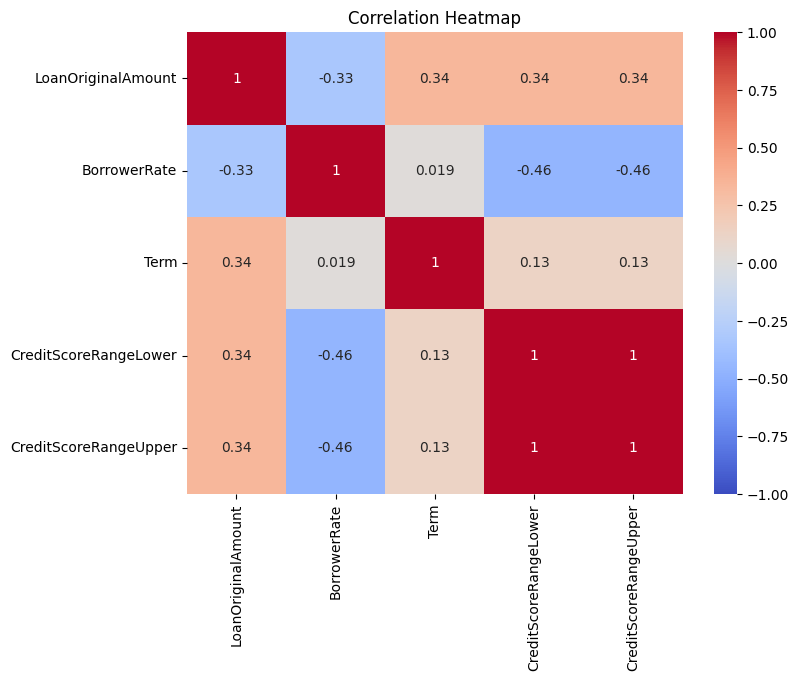

In [23]:


# Select only numeric columns
numeric_df = df.select_dtypes(include=[float, int])

plt.figure(figsize=(8, 6))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.show()


This heatmap visualizes the correlation coefficients between different numeric variables in the dataset. The correlation coefficient ranges from -1 to 1, where:

-   **1** indicates a perfect positive correlation,
-   **-1** indicates a perfect negative correlation, and
-   **0** indicates no correlation.

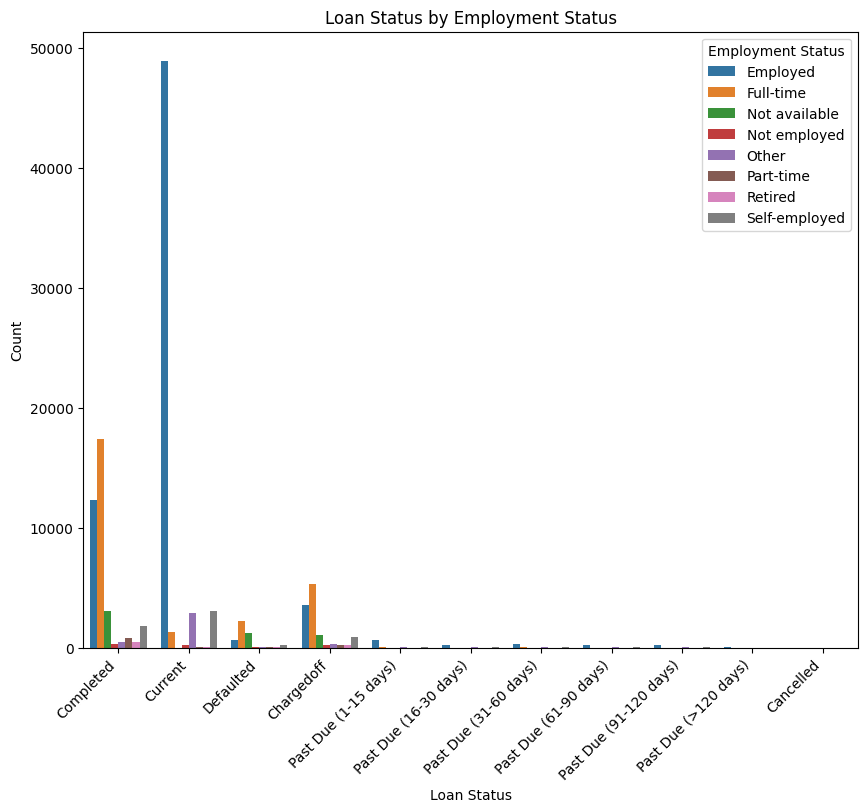

In [24]:

# Convert 'LoanStatus' and 'EmploymentStatus' to categorical types if they aren't already
if not isinstance(df['LoanStatus'].dtype, pd.CategoricalDtype):
    df['LoanStatus'] = pd.Categorical(df['LoanStatus'])
if not isinstance(df['EmploymentStatus'].dtype, pd.CategoricalDtype):
    df['EmploymentStatus'] = pd.Categorical(df['EmploymentStatus'])


plt.figure(figsize=(10, 8))
sns.countplot(data=df, x='LoanStatus', hue='EmploymentStatus')
plt.title('Loan Status by Employment Status')
plt.xlabel('Loan Status')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right') 
plt.legend(title='Employment Status')
plt.show()



This count plot displays the distribution of loan statuses across various employment statuses. The plot helps to understand how employment status correlates with different outcomes of loans.

## Multivariate Exploration



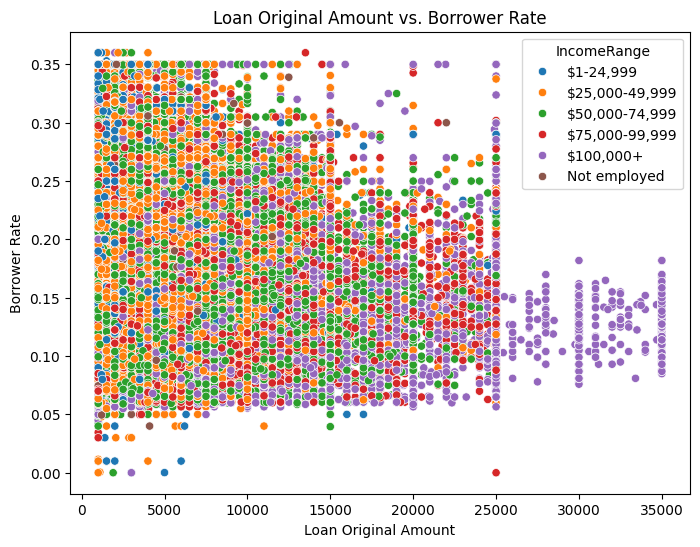

In [25]:
# Convert 'IncomeRange' to a categorical type if it isn't already
if not isinstance(df['IncomeRange'].dtype, pd.CategoricalDtype):
    df['IncomeRange'] = pd.Categorical(df['IncomeRange'])

plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='LoanOriginalAmount', y='BorrowerRate', hue='IncomeRange')
plt.title('Loan Original Amount vs. Borrower Rate')
plt.xlabel('Loan Original Amount')
plt.ylabel('Borrower Rate')
plt.show()


using the income range as a hue classification. Although there is a wide range of borrower rates in the plot across various loan amounts, there isn't instantly clear evidence of a strong linear association between the two variables. The income range color coding shows that borrowers from different income categories are dispersed throughout a range of loan amounts, with a discernible cluster of borrowers with higher incomes ($100,000+) linked to larger loans. This implies that, although the relationship is complex and not only reliant on loan amount, income level may influence both the amount borrowed and the interest rate applied.

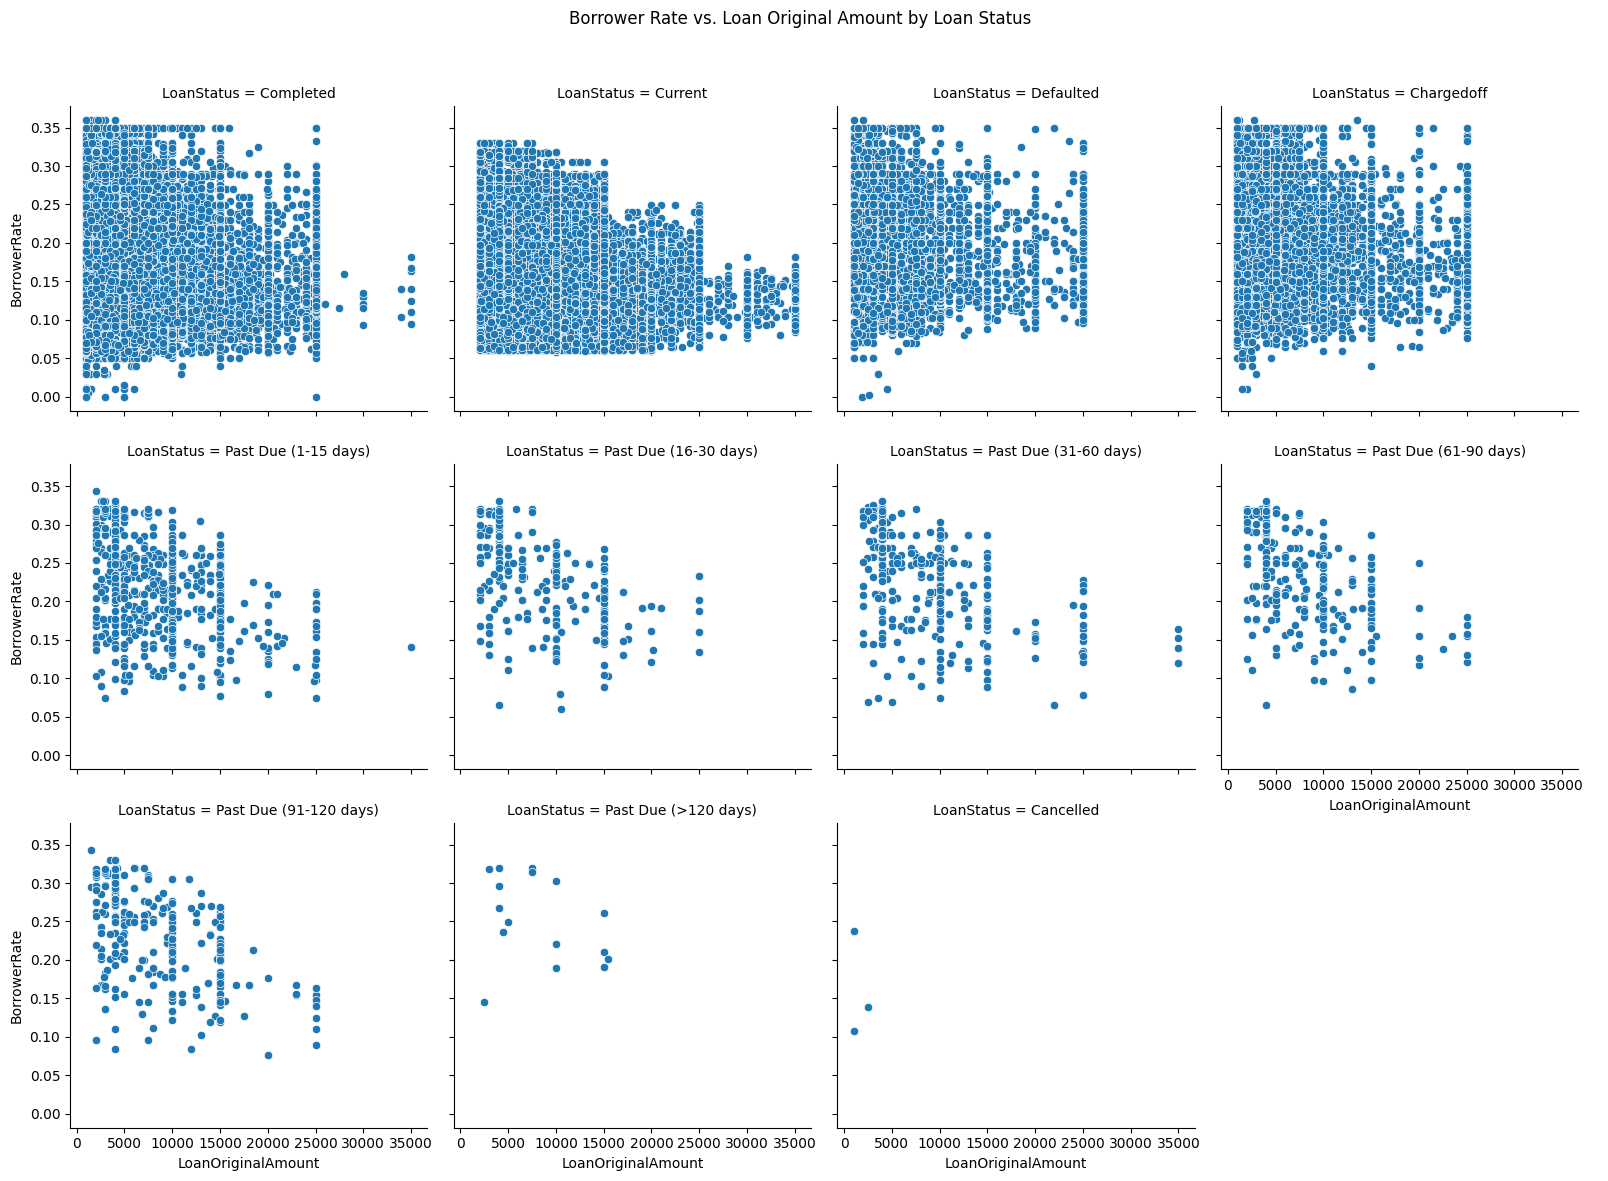

In [26]:
# Facet plot of Borrower Rate vs. Loan Original Amount by Loan Status
g = sns.FacetGrid(df, col="LoanStatus", col_wrap=4, height=4)
g.map(sns.scatterplot, "LoanOriginalAmount", "BorrowerRate")
g.add_legend()
plt.subplots_adjust(top=0.9)
g.fig.suptitle('Borrower Rate vs. Loan Original Amount by Loan Status')
plt.show()



This facet plot provides insights into how the relationship between borrower rates and loan amounts varies based on loan status. A higher probability of loan default or delinquency seems to be correlated with higher borrower rates, especially in the early phases of past due. The plot also implies that, particularly for bigger amounts, successfully completed and ongoing loans frequently have lower borrower rates.



> ### Relationships Observed

>During the investigation, one notable relationship was between `BorrowerRate` and `LoanOriginalAmount`. These two features strengthened each other when examining loan risks. Higher loan amounts often came with higher interest rates, suggesting that lenders might perceive larger loans as riskier, requiring higher rates to compensate.

> ### Strengthening Features

>The relationship between `ProsperRating` and `BorrowerRate` also stood out. Loans with better Prosper ratings (e.g., AA, A) were consistently associated with lower interest rates, while those with lower ratings (e.g., D, E) had much higher rates. This interaction strengthened the observation that Prosper's rating system effectively captures the risk associated with each loan.

> ### Surprising Interactions

>An interesting and somewhat surprising interaction was between `IncomeRange` and `LoanStatus`. While it was expected that higher-income borrowers would have a better chance of loan repayment, the extent of this relationship was striking. Borrowers in the highest income ranges ($100,000+) had significantly lower rates of default compared to those in the lowest ranges (under $25,000), where defaults were much more common. This underlines how critical income level is in determining loan outcomes.

>Another surprising interaction was between `EmploymentStatus` and `LoanOriginalAmount`. Borrowers who were "Employed" or "Self-employed" tended to secure larger loans, while those who were "Not employed" or "Retired" had smaller loans, which might reflect lenders' confidence in the borrower's ability to repay based on employment status.

## Conclusions





**Summary of Main Findings:**

1.  **BorrowerRate and LoanOriginalAmount:** There is a clear positive correlation between `BorrowerRate` and `LoanOriginalAmount`, indicating that larger loans are often associated with higher interest rates. This suggests that lenders view higher loan amounts as riskier, warranting increased rates to mitigate potential losses.
    
2.  **ProsperRating and BorrowerRate:** Loans with better Prosper ratings (e.g., AA, A) consistently have lower interest rates, while those with lower ratings (e.g., D, E) exhibit significantly higher rates. This highlights the effectiveness of Prosper's rating system in reflecting loan risk.
    
3.  **IncomeRange and LoanStatus:** Higher-income borrowers are significantly less likely to default on loans compared to lower-income borrowers. This strong relationship underscores the importance of income level in determining loan repayment outcomes.
    
4.  **EmploymentStatus and LoanOriginalAmount:** Borrowers who are "Employed" or "Self-employed" tend to receive larger loans, while those who are "Not employed" or "Retired" are generally approved for smaller amounts. This pattern likely reflects lenders' assessment of repayment ability based on employment status.
    
5.  **Unusual Distributions:** The distribution of `BorrowerRate` showed a concentration of values at specific rates, likely due to standard rate offerings for different credit risk levels. Additionally, `LoanOriginalAmount` displayed a skew towards lower amounts, with fewer high-value loans, indicating a possible preference or affordability constraint among borrowers.


**Reflection on the Exploration Process:**

-   **Structured Approach:** The data exploration was carried out systematically, starting with univariate analysis to understand the distribution of key features, followed by bivariate and multivariate analyses to uncover relationships between variables.
    
-   **Data Wrangling:** Necessary data cleaning and transformation steps were performed to handle missing values, correct data types, and ensure that the dataset was tidy and ready for analysis.
    
-   **Visualizations:** Visualization techniques were crucial in uncovering patterns and relationships in the data. Histograms, scatter plots, and box plots helped in identifying trends and anomalies.
    
-   **Iterative Exploration:** The process was iterative, requiring multiple rounds of exploration to refine the questions and focus on the most insightful relationships. This iterative approach was essential in digging deeper into the data to uncover meaningful findings.